<a href="https://colab.research.google.com/github/Raghavendarlokineni/colab-machine-learning/blob/develop/gaussian_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import math
import matplotlib.pyplot as plt

class Gaussian():
    """
    gaussian distribution class for calculating and 
    visiualizing gaussian distribution

    Attributes:
        mean (float)
        stdev (float)
        data_list (list of floats)
    """
    def __init__(self, mu = 0, sigma = 1):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []

    def calculate_mean(self):
        """
        method to calculate mean of the data

        Args: None

        Returns: mean of the data set
        """
        avg = 1.0 * sum(self.data) / len(self.data)
        self.mean = avg
        return self.mean

    def calculate_stdev(self, sample=True):
        """
        method to calculate stand deviation

        Args:
            sample: bool - whether data represents a sample or population

        Returns:
            float: standard deviation of data set    
        """    
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
        mean = self.mean
        sigma = 0

        for d in self.data:
            sigma += (d - mean) ** 2
        
        sigma = math.sqrt(sigma / n)
        self.stdev = sigma
        
        return self.stdev

    def read_data_file(self, file_name, sample=True):
        """
        method to read data from a text file

        Args:
            file_name - string
        
        Returns:
            None
        """
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()

        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)

    def plot_histogram(self):
        """
        method to output histogram

        Args: None

        Returns: None
        """
        plt.hist(self.data)
        plt.title("histogram of data")
        plt.xlabel("data")
        plt.ylabel("count")

    def pdf(self, x):
        """
        probablity density function

        Args: 
            x - float

        Returns:
            float    
        """
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)

    def plot_histogram_pdf(self, n_spaces = 50):
        """
        method to plot normalised histogram

        Args: 
            n_spaces - int - number of data points

        Returns:
            list: x values for the pdf plot
            list: y values for the pdf plot
        """

        mu = self.mean 
        sigma = self.stdev
        min_range = min(self.data)
        max_range = max(self.data)

        # calculates interval b/w x values
        interval = 1.0 * (max_range - min_range) / n_spaces

        x = []
        y = []

        # calculate x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval * i
            x.append(tmp)
            y.append(self.pdf(tmp))

        #make the plots
        fig, axes = plt.subplots(2, sharex=True)
        fig.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed Histogram of Data')
        axes[0].set_ylabel('Density')

        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n Sample Mean and Sample Standard Deviation')
        axes[0].set_ylabel('Density')
        plt.show()

        return x, y



...

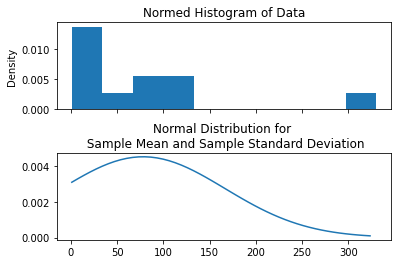

.
----------------------------------------------------------------------
Ran 4 tests in 0.433s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

In [7]:
# Unit tests for checking the solution
import unittest

class TestGaussianClass(unittest.TestCase):
    def setUp(self):
        self.gaussian = Gaussian(25, 2)

    def test_initialization(self): 
        self.assertEqual(self.gaussian.mean, 25, 'incorrect mean')
        self.assertEqual(self.gaussian.stdev, 2, 'incorrect standard deviation')

    def test_pdf(self):
        self.assertEqual(round(self.gaussian.pdf(25), 5), 0.19947,\
         'pdf function does not give expected result') 

    def test_meancalculation(self):
        self.gaussian.read_data_file('numbers.txt', True)
        self.assertEqual(self.gaussian.calculate_mean(),\
         sum(self.gaussian.data) / float(len(self.gaussian.data)), 'calculated mean not as expected')

    def test_stdevcalculation(self):
        self.gaussian.read_data_file('numbers.txt', True)
        self.assertEqual(round(self.gaussian.stdev, 2), 92.87, 'sample standard deviation incorrect')
        self.gaussian.read_data_file('numbers.txt', False)
        self.assertEqual(round(self.gaussian.stdev, 2), 88.55, 'population standard deviation incorrect')

        self.gaussian.plot_histogram_pdf(50)
                
tests = TestGaussianClass()

tests_loaded = unittest.TestLoader().loadTestsFromModule(tests)

unittest.TextTestRunner().run(tests_loaded)